In [0]:
from google.colab import files 
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [0]:
sms = [line for line in open('SMSSpamCollection')] # \n \t \r 

In [0]:
sms

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call

Lets Check How Many Messages we have in "SMS"

In [0]:
len(sms),type(sms)

(5574, list)

In [0]:
sms[1]

'ham\tOk lar... Joking wif u oni...\n'

In [0]:
# First Column will be label/target 'ham\spam'
# 2nd Columns will Deliver u exact message

In [0]:
import pandas as pd

In [0]:
smstest = pd.read_csv('SMSSpamCollection',sep='\t',
                      names=['target','sms'])
smstest

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [0]:
smstest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [0]:
smstest.describe()

,target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [0]:
smstest.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [0]:
smstest['length']=smstest['sms'].apply(len)
smstest

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


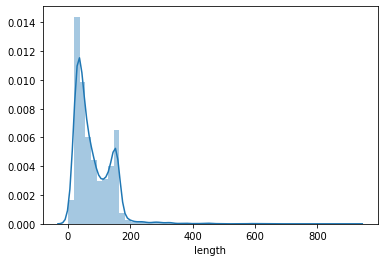

In [0]:
sns.distplot(smstest['length'])

In [0]:
import matplotlib.pyplot as plt


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa64dc30a90>,
      dtype=object)

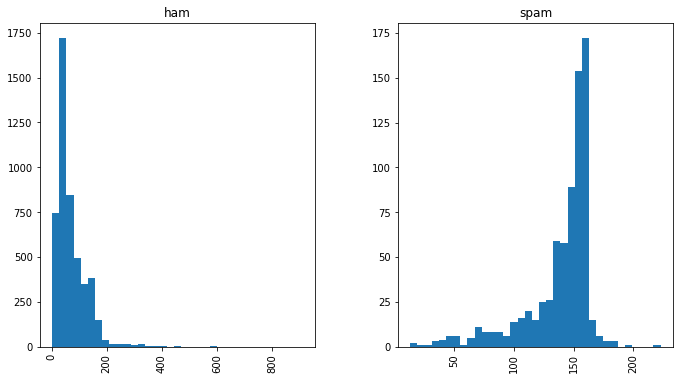

In [0]:
smstest.hist(column='length',by='target',bins=35,figsize=(11,6))

In [0]:
# Text Pre Processing ( Try to Reomve Punctuation)

In [0]:
import string

In [0]:
test = "hello this is Tuesday! , How are you ?"

In [0]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
nonpunc = [char for char in test if char not in string.punctuation]
nonpunc[0:24]

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'T',
 'u',
 'e',
 's',
 'd',
 'a',
 'y',
 ' ',
 ' ',
 'H']

In [0]:
# You Can Join End of All Work

In [0]:
nonpunc = ''.join(nonpunc)
nonpunc

'hello this is Tuesday  How are you '

In [0]:
# Removing Stop Word

In [0]:
from nltk.corpus import stopwords

In [0]:
stopwords.words('english')[0:5]

LookupError: ignored

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [0]:
test

'hello this is Tuesday! , How are you ?'

In [0]:
# Removing all stop words 

clean = [word for word in nonpunc.split()
            if word.lower() not in stopwords.words('english')]

# Now Compare with Existing String

print('Input was:' , nonpunc.split())
print('Output is:',clean)

Input was: ['hello', 'this', 'is', 'Tuesday', 'How', 'are', 'you']
Output is: ['hello', 'Tuesday']


In [0]:
smstest

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [0]:
 # Input : Hi! Today Tuesday...
 # Output: Hi Today Tuesday 

In [0]:
smstest['sms'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sms, dtype: object

In [0]:
smstest['sms'].head(5).apply(process_text)

NameError: ignored

In [0]:
1. Remove All Punc
2. Remove All Stop words
3. Returns a list of newly formed type 

In [0]:
def process_text(raw_text):
   # Let us check the punctuations 

   nonpunc = [char for char in raw_text
              if char not in string.punctuation]

  # Join all the character

   nonpunc=''.join(nonpunc)

   # Remove All the Stop words

   return [ word for word in nonpunc.split()
            if word.lower() not in stopwords.words('english')]



In [0]:
smstest['sms'].head(5).apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: sms, dtype: object

BoW( Bag of Words) 

1. Term Freq: By Counting how many times does a word appeared in each message 

2. Inverse Document Freq: Which is Actually a weigh of Counts , frequent tokens get lower right 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
bow_transformation = CountVectorizer(
    analyzer =process_text).fit(smstest['sms'])

In [0]:
print(len(bow_transformation.vocabulary_))

11425


In [0]:
bow_transformation.vocabulary_.get('way')

10979

In [0]:
sms19 = smstest['sms'][19]

bow_19 = bow_transformation.transform([sms19])

print(bow_19)
print(bow_19.shape)

  (0, 382)	1
  (0, 677)	1
  (0, 870)	2
  (0, 1728)	1
  (0, 1784)	1
  (0, 2772)	1
  (0, 3141)	1
  (0, 3460)	1
  (0, 4042)	1
  (0, 4062)	1
  (0, 6123)	1
  (0, 6258)	1
  (0, 6870)	1
  (0, 8191)	1
  (0, 8362)	1
  (0, 8415)	1
  (0, 10338)	1
  (0, 10777)	1
  (0, 10816)	1
(1, 11425)
